# SPACEDOS02

In [277]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, timezone
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# SPACEDOS ISS 2019-2020

Launch Soyuz MS-15: 25.09.2019, 13:57:42.701 UTC
- Launch site: Baikonur
- Launch pad: 1
- Altitude: 414 km
- Inclination: 51.6°

### Docking ISS: 25.09.2019, 19:42:40 UTC
### Undocking ISS: 06.02.2020, 05:50:28 UTC

Landing Soyuz MS-13: 06.02.2020, 09:12:23 UTC
- Landing site: 47°26'34.26''N, 69°33'52.26''E



## Flux

Text(0, 0.5, 'Flux [cm$^-$$^2$ s$^-$$^1$]')

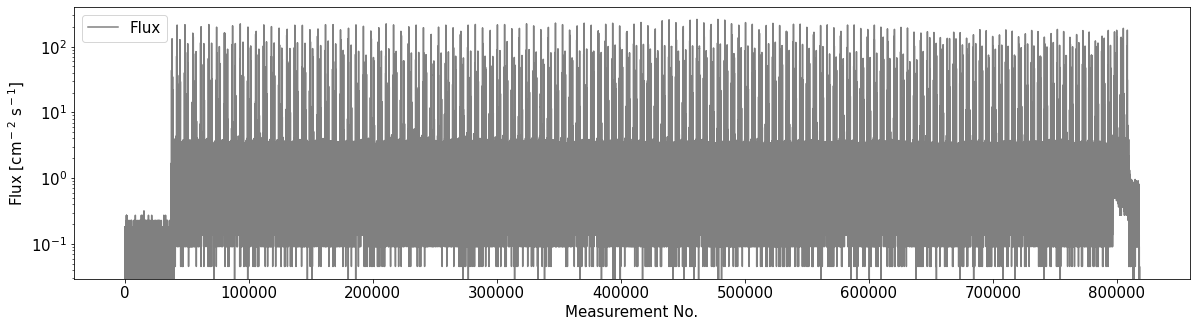

In [278]:
fto = 'iss2019.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*')#,engine='python' )

rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

# shift one column left for offset 255
rc.loc[rc['257']==255] = rc.loc[rc['257']==255].shift(-1,axis=1)

rc['sum'] = rc.loc[:,'6':'253'].sum(axis=1)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rc['sum']/11/2, c='gray', label='Flux')
plt.yscale('log')

plt.legend()

plt.xlabel('Measurement No.')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')



## Spectrum

0.105 0.038


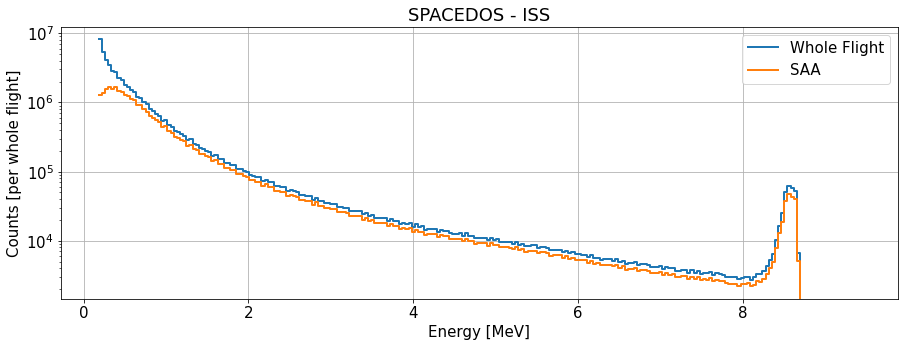

In [279]:
plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

LOW_ENERGY = 6
HIGH_ENERGY = 250
CH = 3

rc.iloc[:,LOW_ENERGY] = rc.iloc[:,LOW_ENERGY] - 13 # subtracting noise from the first channel

ener1 = rc.sum()[LOW_ENERGY:HIGH_ENERGY]
ener2 = rc.loc[(rc['sum']>80)].sum()[LOW_ENERGY:HIGH_ENERGY] # SAA

coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.105

print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['i'] = ener1.index
e['x'] = (e['i'].astype(float)-CH) * coef[1] + coef[0]

plt.yscale('log')

plt.plot(e['x'], e['1'], label='Whole Flight', lw=2, drawstyle='steps-post')

e['1'] = ener2
e['i'] = ener2.index
plt.plot(e['x'], e['1'], label='SAA', lw=2, drawstyle='steps-post')

plt.legend()
plt.title('SPACEDOS - ISS')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts [per whole flight]')
plt.grid()

## Dose rate

772188


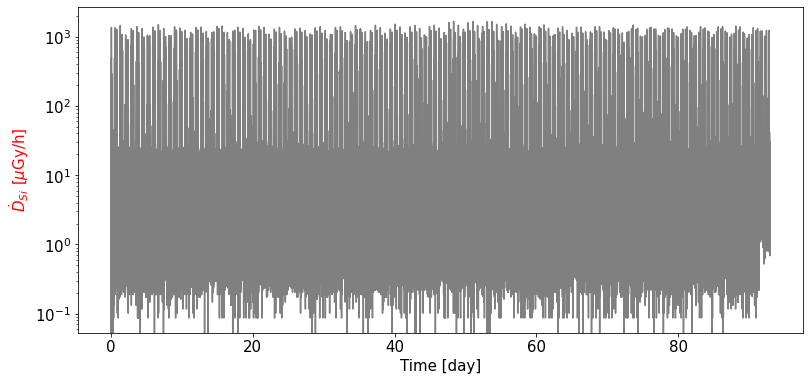

772188


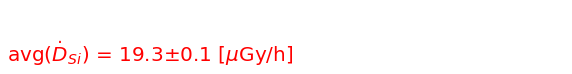

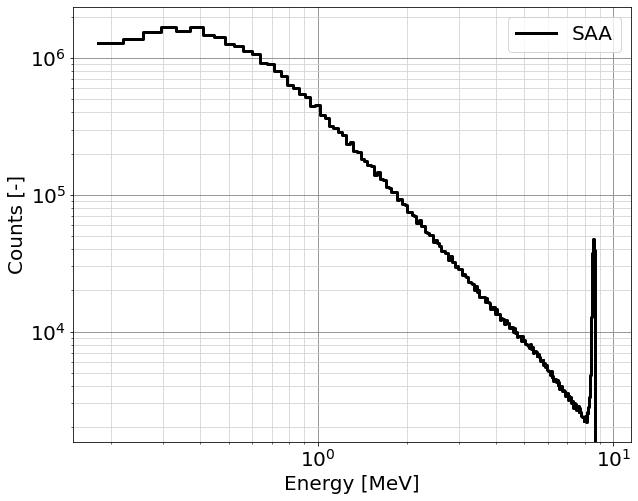

In [280]:
xx = rc[37432:809620].copy()
xx['seconds'] = xx['2']

print(len(xx))

CHANNELS = 245
NOISE_LEVEL = 7
FROM_ENERGY = 3

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.105 #- 0.038/2
xx['ener'] = ((xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener'])).sum(axis=1)
xx['time'] = np.linspace(0, len(xx)*10.4, len(xx))

plt.figure(figsize=(13, 6))

xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 # in uGy/day
xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))

plt.plot( xx.time/3600/24, xx['ddsi'], c='gray', label='SPACEDOS')

plt.yscale('log')

plt.xlabel('Time [day]')
plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/h]', color='red')

DEATH_TIME = 1

dose = xx
avg_ddsi = round(xx['ddsi'].mean(), 1)
#avg_ddsi_err = round(xx['ddsi'].std(), 1)
avg_ddsi_err = round(xx['ddsi'].sem(), 1)
sum_dsi = round(xx['dsi'].sum()*DEATH_TIME/1e3,1)

plt.show()

print(len(xx))

plt.figure(figsize=(10,1))
plt.text(0, 0, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/h]', fontsize=20, color='r', backgroundcolor='white')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')

plt.plot(e['x'],e['1'], c='black', lw=3, drawstyle='steps-post', label='SAA')
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]
ener = ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener']
plt.legend(loc=0)
plt.show()

None

# SPACEDOS ISS 2020-2021

Launch Soyuz MS-17: 14 October 2020, 05:45:04
- Launch site: Baikonur
- Launch pad: Site 31
- Altitude: 420 km
- Inclination: 51,6°
 
### Docking ISS: 14 October 2020, 08:48:47 UTC
### Undocking ISS: 17 April 2021, 01:34 UTC 
Landing Soyuz MS-17: 17 April 2021, 04:55 UTC
- Landing site: Kazakh Steppe

_Note: Gaps in measurement after measurement number 678000_

## Flux

Text(0, 0.5, 'Flux [counts per 10 s]')

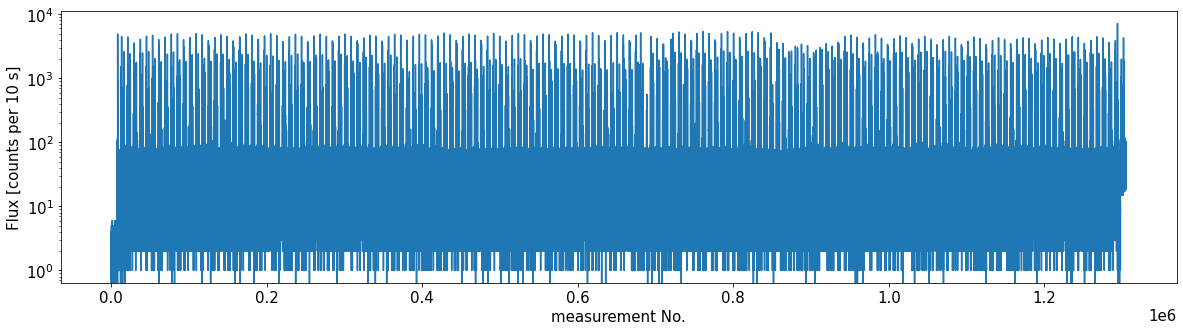

In [281]:
rc = pd.read_csv('iss2020.csv')
#rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rc['sum'] = rc.iloc[:,10:28].sum(axis=1)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

rc['sum'].plot()
plt.yscale('log')

plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 10 s]')


## Spectrum

0.105 0.038


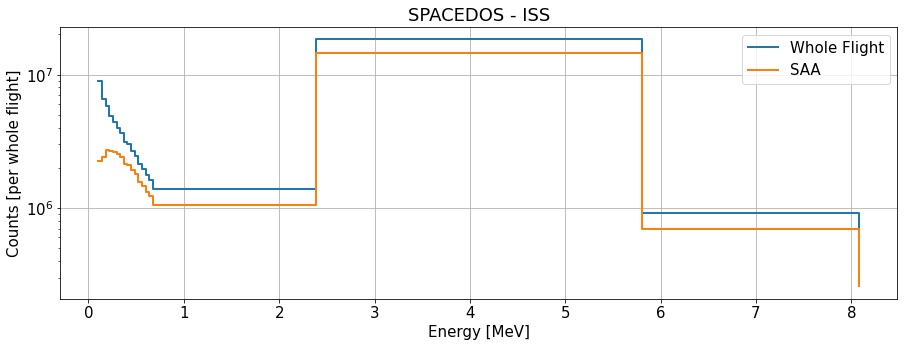

In [282]:
plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

LOW_ENERGY = 10
HIGH_ENERGY = 29


ener1 = rc.sum()[LOW_ENERGY:HIGH_ENERGY]
ener2 = rc.loc[(rc['sum']>200)].sum()[LOW_ENERGY:HIGH_ENERGY] # SAA

coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.105

print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['i'] = ener1.index
e['x'] = (e['i'].astype(float)-9) * coef[1] + coef[0]
e.loc['25','x'] = (100 + 20)/2 * coef[1] + coef[0]
e.loc['26','x'] = (200 + 100)/2 * coef[1] + coef[0]
e.loc['27','x'] = (220 + 200)/2 * coef[1] + coef[0]

plt.yscale('log')

plt.plot(e['x'], e['1'], label='Whole Flight', lw=2, drawstyle='steps-post')

e['1'] = ener2
e['i'] = ener2.index
plt.plot(e['x'], e['1'], label='SAA', lw=2, drawstyle='steps-post')

plt.legend()
plt.title('SPACEDOS - ISS')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts [per whole flight]')
plt.grid()

## Dose rate

1304800


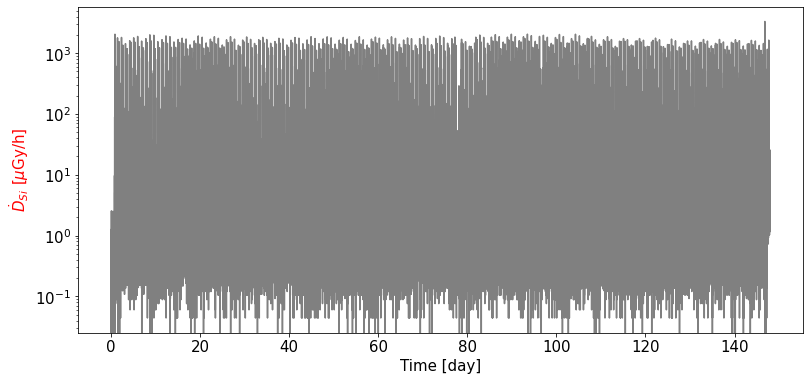

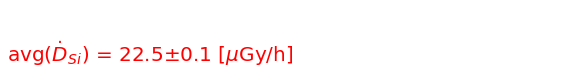

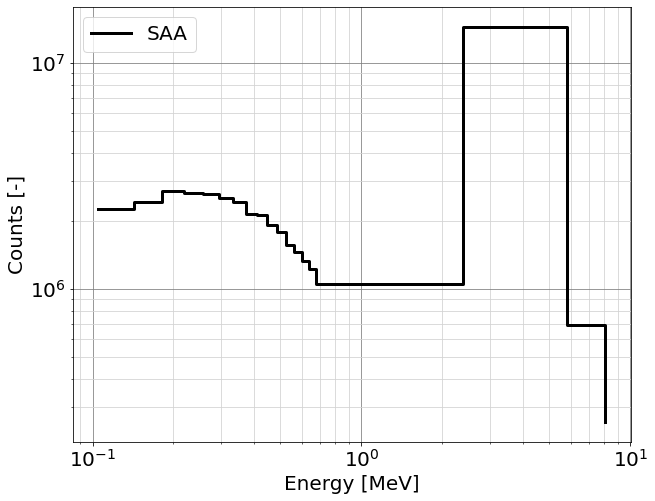

In [283]:
xx = rc.copy()

print(len(xx))

CHANNELS = 21
NOISE_LEVEL = 10
FROM_ENERGY = 0

coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.105

ee = pd.DataFrame()
ee['Ch']=range(0,29)
ee['ener'] = ee.index * coef[1] + coef[0]
ee.loc[16,'ener'] = (100 + 20)/2 * coef[1] + coef[0]
ee.loc[17,'ener'] = (200 + 100)/2 * coef[1] + coef[0]
ee.loc[18,'ener'] = (220 + 200)/2 * coef[1] + coef[0]

xx['ener'] = ((xx.iloc[:,10:29]) * np.asarray(ee.loc[0:18,'ener'])).sum(axis=1)
xx['time'] = np.linspace(0, len(xx)*9.8, len(xx))

plt.figure(figsize=(13, 6))

xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/9.8) * 3600  # in uGy/hour
xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))

plt.plot( xx.time/3600/24, xx['ddsi'], c='gray', label='SPACEDOS')

#plt.ylim([0,4])
plt.yscale('log')

plt.xlabel('Time [day]')
plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/h]', color='red')

DEATH_TIME = 1

dose = xx
avg_ddsi = round(xx['ddsi'].mean(), 1)
#avg_ddsi_err = round(xx['ddsi'].std(), 1)
avg_ddsi_err = round(xx['ddsi'].sem(), 1)
sum_dsi = round(xx['dsi'].sum()*DEATH_TIME/1e3,1)

plt.show()

plt.figure(figsize=(10,1))
plt.text(0, 0, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/h]', fontsize=20, color='r', backgroundcolor='white')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')

plt.plot(e['x'],e['1'], c='black', lw=3, drawstyle='steps-post', label='SAA')
#plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
#plt.grid()
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')

hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]
ener = ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener']
plt.legend(loc=2)
plt.show()

None